<H1> Twitter sentiment Analysis </H1>

<p>The training dataset contains around 7k tweet text with the sentiment label.

The dataset has 3 columns

tweet_id - Unique id for tweets. tweet - Tweet about the brand/product sentiment - 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell</p>

In [1]:
#import required libraries
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#set display to max_colwidth to see the entire tweet
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
pd.set_option('display.max_colwidth', -1)

In [3]:
df = pd.read_csv(r'C:\Users\HPPC\train.csv')

In [4]:
#Check the value count for each sentiment category
value_counts = df['sentiment'].value_counts(dropna=True,sort=True)
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['sentiment', 'counts'] # change column names

In [5]:
#Creating dataframe to store value counts of each category
df_value_counts

,sentiment,counts
0,1,4311
1,2,2382
2,0,456
3,3,125


As we can see from the counts there is class imbalance in data

In [14]:
sentiment_label = ['Negative','Neutral','Positive','Can''t tell']
count_values = df_value_counts['counts']
colors = ['red', 'yellow', 'green', 'lightgreen']
sentiments = go.Pie(labels=sentiment_label, values=count_values, marker=dict(colors=colors
                                                            , line=dict(color='#C0C0C0',width=2)),
                                                            name='Twitter Sentiments', textinfo='label+percent')


layout = go.Layout(height = 500,
                   width = 900,
                   autosize = False,
                   title = 'Tweets Sentiment Distribution')
fig = go.Figure(data = sentiments, layout = layout)


fig.show()

In [15]:
negative = df[df['sentiment']==0]
neutral = df[df['sentiment']==1]
positive = df[df['sentiment']==2]
cantell = df[df['sentiment']==3]

In [16]:
#Function to generate wordcloud
def generate_wordcloud(df):
    all_words = ' '.join([text for text in df['tweet']])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

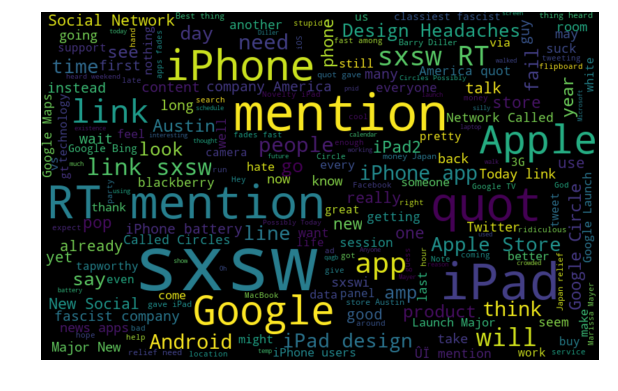

In [19]:
#Generate word cloud for negative sentiment
generate_wordcloud(negative)

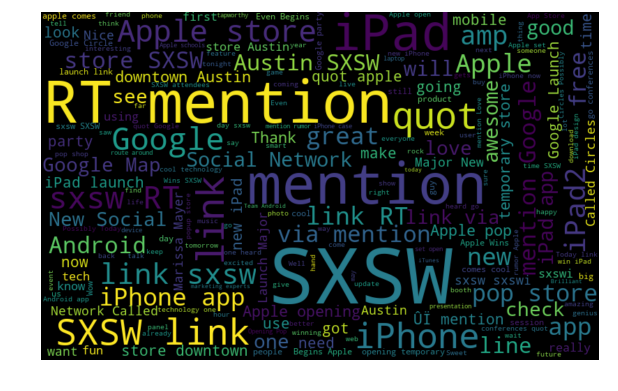

In [20]:
#Wordcloud for positive sentiment
generate_wordcloud(positive)

In [44]:
#Word cloud for cantell sentiment
generate_wordcloud(neutral)

TypeError: sequence item 769: expected str instance, float found

<H1>Input variable </H1>
<B>To analyze the text variable we will compute some basic statistics on text variable.</B>
<li>count_words: number of words in the tweet</li>
<li>count_mentions: referrals to other Twitter accounts start with a @</li>
<li>count_hashtags: number of tag words, preceded by a #</li>
<li>count_capital_words: number of uppercase words are sometimes used to “shout” and express (negative) emotions</li>
<li>count_excl_quest_marks: number of question or exclamation marks</li>
<li>count_urls: number of links in the tweet, preceded by http(s)</li>
<li>count_emojis: number of emoji, which might be a good sign of the sentiment</li>

In [28]:
#Regex function for returing the count of pattern
import re
def count_regex(regpattern, tweet):
        #print(regpattern)
        return len(re.findall(regpattern, tweet))

In [32]:
df = df.dropna()

In [33]:
def text_stats(df):
    count_words = []
    count_mentions=[]
    count_hashtags=[]
    count_capital_words=[]
    count_excl_quest_marks=[]
    count_urls=[]
    count_pos_emojis=[]
    count_neg_emojis=[]
    for ind in df.index:     
        text = df['tweet'][ind]
        word_count = count_regex(r'\w+',text)
        mention_count = count_regex(r'@\w+',text)
        hashtags_count = count_regex(r'#\w+', text)
        capital_words_count = count_regex(r'\b[A-Z]{2,}\b', text)
        excl_quest_marks_count = count_regex(r'!|\?', text)
        urls_count = count_regex(r'http.?://[^\s]+[\s]?',text)
        pos_emojis_count = count_regex(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:\s?D|:-D|x-?D|X-?D|<3|:\*|;-?\)|;-?D|\(-?;)',text)
        neg_emojis_count = count_regex(r'(:\s?\(|:-\(|\)\s?:|\)-:|:,\(|:\'\(|:"\()',text)
        count_words.append(word_count)
        count_mentions.append(mention_count)
        count_hashtags.append(hashtags_count)
        count_capital_words.append(capital_words_count)
        count_urls.append(urls_count)
        count_pos_emojis.append(pos_emojis_count)
        count_neg_emojis.append(neg_emojis_count)
        count_excl_quest_marks.append(excl_quest_marks_count)
    new_df = pd.DataFrame({ 'Tweet':df['tweet']
                           , 'sentiment':df['sentiment']
                           ,  'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                           , 'count_pos_emojis': count_pos_emojis
                           , 'count_neg_emojis': count_neg_emojis
                          })
    
    return new_df    

In [34]:

counts_df = text_stats(df)
print(counts_df.head(10))

                                                                                                                                             Tweet  \
0  #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                         
1  Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw   
2  one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}              
3  This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                     
4  Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                     
5  #technews One lone dude awaits iPad 2 at AppleÛªs SXSW store {link} #Tech_News #Apple #iPad_2 #S

In [36]:
def show_dist(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('sentiment')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='sentiment', height=5, hue='sentiment', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()


Descriptive stats for count_words
---------------------------------
            count       mean       std  min   25%   50%   75%   max
sentiment                                                          
0          456.0   19.500000  5.405736  6.0  16.0  20.0  24.0  32.0
1          4310.0  18.045012  5.223198  2.0  14.0  18.0  22.0  41.0
2          2382.0  18.863980  5.289912  4.0  15.0  19.0  23.0  35.0
3          125.0   18.152000  5.296158  8.0  14.0  18.0  22.0  30.0


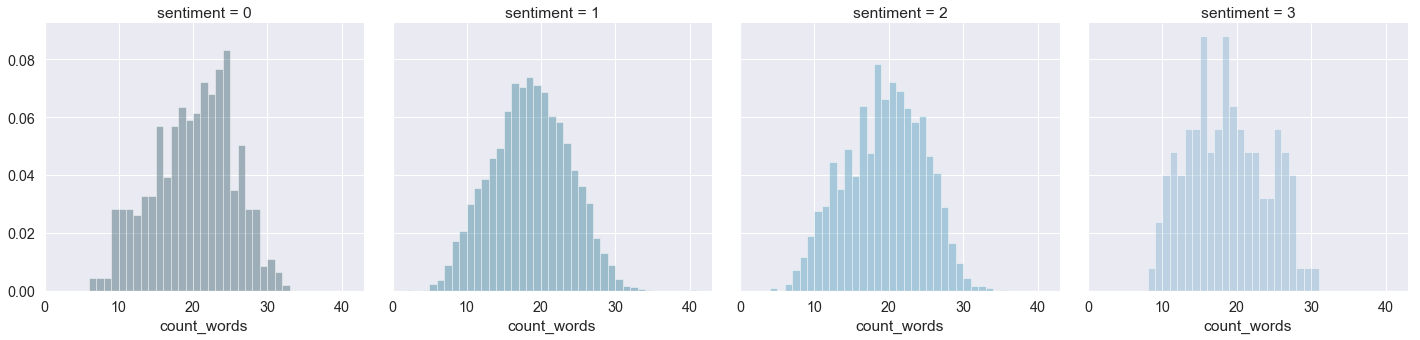

In [37]:
show_dist(counts_df, 'count_words')

Descriptive stats for count_mentions
------------------------------------
            count      mean       std  min  25%  50%  75%  max
sentiment                                                     
0          456.0   0.552632  0.739374  0.0  0.0  0.0  1.0  4.0
1          4310.0  0.850348  0.976455  0.0  0.0  1.0  1.0  8.0
2          2382.0  0.740134  0.838025  0.0  0.0  1.0  1.0  5.0
3          125.0   0.640000  0.962188  0.0  0.0  0.0  1.0  5.0


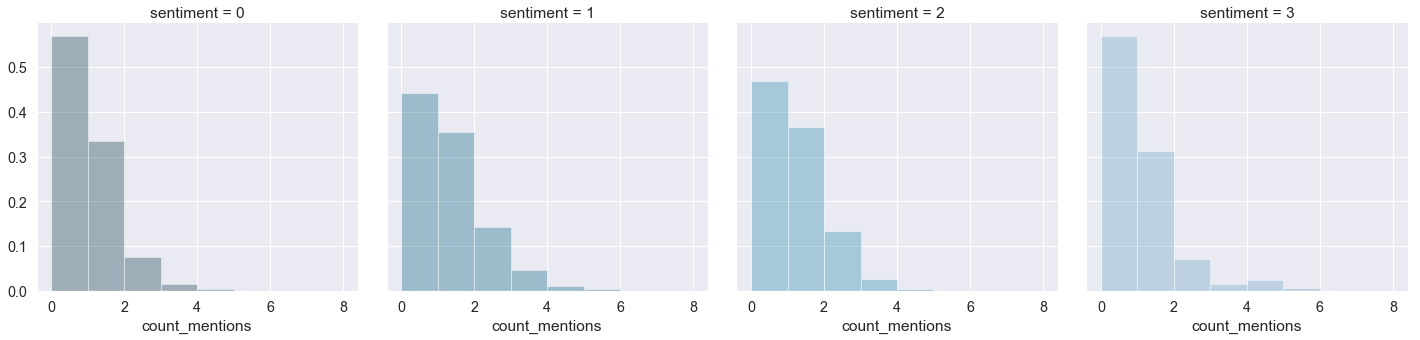

In [38]:
show_dist(counts_df, 'count_mentions')

Descriptive stats for count_hashtags
------------------------------------
            count      mean       std  min  25%  50%  75%   max
sentiment                                                      
0          456.0   1.605263  0.839868  1.0  1.0  1.0  2.0  6.0 
1          4310.0  1.792575  1.180463  0.0  1.0  1.0  2.0  12.0
2          2382.0  1.683039  0.952835  0.0  1.0  1.0  2.0  7.0 
3          125.0   1.600000  0.950382  1.0  1.0  1.0  2.0  5.0 


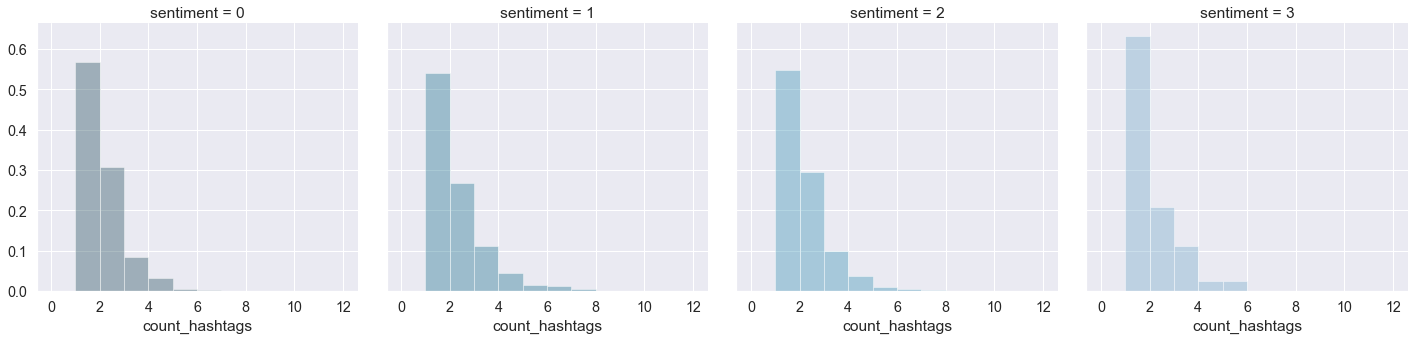

In [209]:
show_dist(counts_df, 'count_hashtags')

Descriptive stats for count_capital_words
-----------------------------------------
            count      mean       std  min  25%  50%  75%   max
sentiment                                                      
0          456.0   0.901316  1.199413  0.0  0.0  1.0  1.0  18.0
1          4310.0  1.110209  1.060554  0.0  0.0  1.0  2.0  17.0
2          2382.0  1.033165  0.963940  0.0  0.0  1.0  2.0  6.0 
3          125.0   0.976000  0.919888  0.0  0.0  1.0  1.0  4.0 


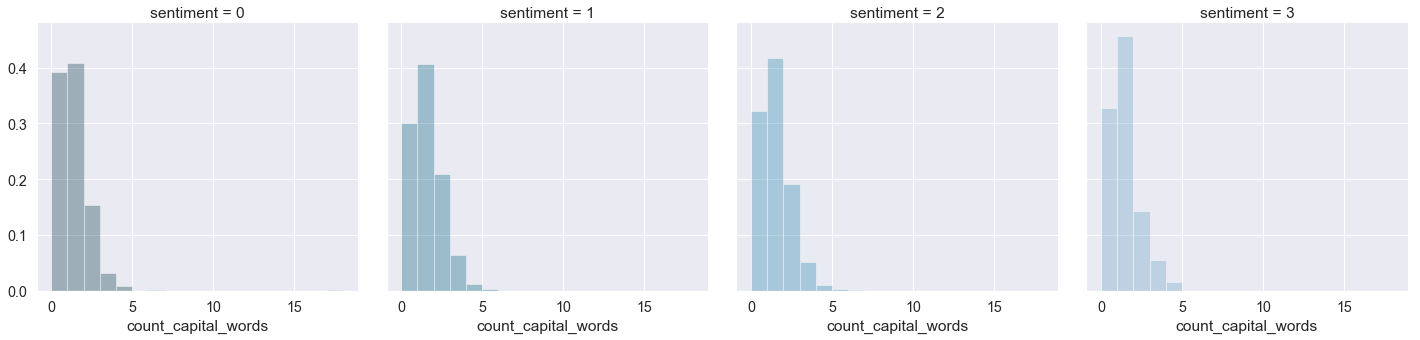

In [39]:
show_dist(counts_df, 'count_capital_words')

Descriptive stats for count_neg_emojis
--------------------------------------
            count      mean       std  min  25%  50%  75%  max
sentiment                                                     
0          456.0   0.013158  0.114076  0.0  0.0  0.0  0.0  1.0
1          4310.0  0.004176  0.074514  0.0  0.0  0.0  0.0  3.0
2          2382.0  0.004198  0.081867  0.0  0.0  0.0  0.0  3.0
3          125.0   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


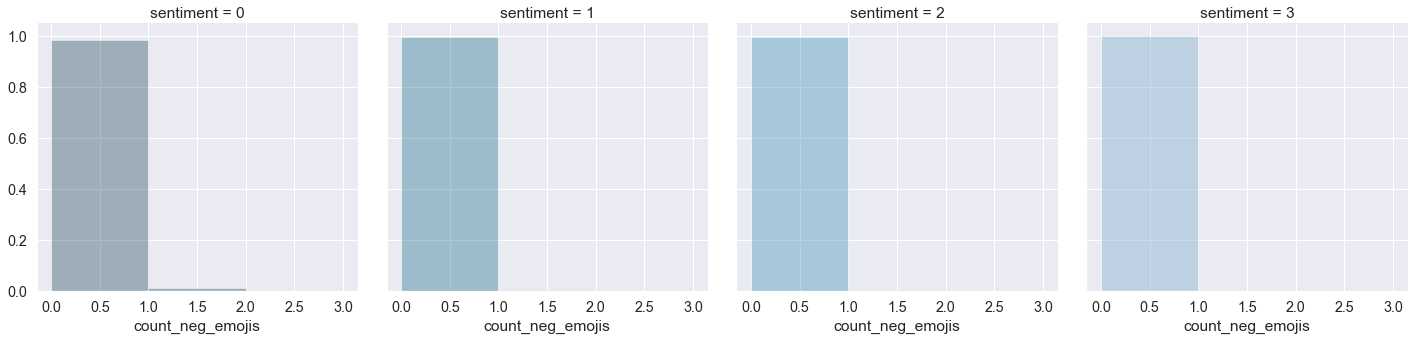

In [229]:
show_dist(counts_df, 'count_neg_emojis')

In [40]:
pivot = counts_df.pivot_table(index=['sentiment'], values=['count_mentions'], aggfunc='max')
print(pivot)

           count_mentions
sentiment                
0          4             
1          8             
2          5             
3          5             


In [41]:
# Finding number of EMOJi's
import re
def smiley_count(tweet):
    #print(tweet)
    smileys=[]
    for i in tweet.split():
        #print(i)
        sm = re.findall(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))',i)
        #sm = re.findall(r'(:,\(|:\'\(|:"\()',i)
        #print(type(sm))
        if sm!=[]:
            #print(sm)
            smileys.append(sm)
        #print(smileys)
    return smileys

In [42]:
tweet = counts_df[counts_df['count_words']==4]

In [43]:
print(tweet)

                                    Tweet  sentiment  count_words  \
2707  Google Circles?  #sxsw #orly?        2          4             
3408  Ipad everywhere. #SXSW {link}        2          4             
5265  @mention #SXSW iPad rocks            2          4             
5754  iPhone sharing???? #sxsw #shareable  1          4             

      count_mentions  count_hashtags  count_capital_words  \
2707  0               2               0                     
3408  0               1               1                     
5265  1               1               1                     
5754  0               2               0                     

      count_excl_quest_marks  count_urls  count_pos_emojis  count_neg_emojis  
2707  2                       0           0                 0                 
3408  0                       0           0                 0                 
5265  0                       0           0                 0                 
5754  4                       0 

In [174]:
count_smileys=[]
sentiment=[]
smiley_tweet=[]
for ind in train.index: 
    c = smiley_count(train['tweet'][ind])
    #print(c)
    count_sm = len(c)
    #print(count_sm)
    if count_sm>0:
        count_smileys.append(len(c))
        sentiment.append(train['sentiment'][ind])
        smiley_tweet.append(train['tweet'][ind])
        #print(train['tweet'][ind],train['sentiment'][ind],count_sm)
#smiley_df = pd.DataFrame(sentiment,count_smileys,columns=['sentiment','count'])
#print(smiley_df)
    #print('Text after cleaning',text)
smiley_sent = pd.DataFrame(list(zip(smiley_tweet,sentiment,count_smileys)),columns=['Tweet','Sentiment','smiley_count'])


In [175]:
smiley_sent

,Tweet,Sentiment,smiley_count
0,RT @mention Any iPAD2's left at the Apple store at #SXSW? Anyone know? :),1,1
1,Awwww yeah!!! RT @mention Congrats to @mention on winning the last @mention #iPad case for her boyfriend aw :) #SXSW #cbatsxsw,2,1
2,"@mention Hey Mark, no sleep for you at #sxsw! Bring me home a shiny new iPad, would ya? :) @mention",2,1
3,Any blackberry apps for #sxsw ?? Pls let @mention and I know...cheers...will have iphone too...:-),3,1
4,ÛÏ@mention Get ready for the word &quot;Circles&quot; to be trending #SXSWi #SXSW :)Û #Google #Circles #social,2,1
5,"Getting hip to new Android apps in preparation for #Hangover3, also known as #SXSW. @mention @mention and @mention apps rock my socks :)",2,1
6,@mention yay :) thank you! what do you do? #pushio #sxsw #ipad,1,1
7,@mention - re: &quot;lack of #SXSW newsworthy announcements&quot;. Unless you count Google Circles. :) #googlecircles,2,1
8,RT @mention Apple autocorrect is so weird. Ogilvy autocorrects to idiocy. #ogilvynotes #sxsw :),0,1
9,Remaining iPad 2 stock at #sxsw Apple store.. Come get one :-) {link},2,1


In [176]:
smiley_sent['Sentiment'].value_counts()

2    59
1    46
3    4 
0    4 
Name: Sentiment, dtype: int64

In [180]:
smiley_sent[smiley_sent['Sentiment']==2]

,Tweet,Sentiment,smiley_count
1,Awwww yeah!!! RT @mention Congrats to @mention on winning the last @mention #iPad case for her boyfriend aw :) #SXSW #cbatsxsw,2,1
2,"@mention Hey Mark, no sleep for you at #sxsw! Bring me home a shiny new iPad, would ya? :) @mention",2,1
4,ÛÏ@mention Get ready for the word &quot;Circles&quot; to be trending #SXSWi #SXSW :)Û #Google #Circles #social,2,1
5,"Getting hip to new Android apps in preparation for #Hangover3, also known as #SXSW. @mention @mention and @mention apps rock my socks :)",2,1
7,@mention - re: &quot;lack of #SXSW newsworthy announcements&quot;. Unless you count Google Circles. :) #googlecircles,2,1
9,Remaining iPad 2 stock at #sxsw Apple store.. Come get one :-) {link},2,1
10,Sweet :) RT @mention Bday pressie for myself: iPhone 4. @mention got a matching one. Now we can fit in with hipsters #sxsw this wkd ;),2,1
11,iPad 2 - is now available for online ordering. Go get urs. :-) #Sxsw,2,1
12,RT @mention @mention Cool! That means we can watch Ustream in Skyfire browser on iPhone :-)\r\n(Safari doesn't work) \r\nHave fun! #sxsw,2,1
13,Can't wait anymore!!! :)) &quot;Google to Launch Major New Social Network Called Circles&quot; (via @mention {link} #google #circles #sxsw,2,1


In [ ]:
#Understanding hashtags

In [239]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [240]:

HT_negative = hashtag_extract(df['tweet'][df['sentiment'] == 0])
print(type(HT_negative))
HT_neutral = hashtag_extract(df['tweet'][df['sentiment'] == 1])
HT_positive = hashtag_extract(df['tweet'][df['sentiment'] == 2])
HT_cantell = hashtag_extract(df['tweet'][df['sentiment'] == 3])
# unnesting list
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])
HT_positive = sum(HT_positive,[])
HT_cantell = sum(HT_cantell,[])
#print(HT_negative)
#print(HT_neutral)
#print(HT_positive)
#print(HT_cantell)

<class 'list'>


In [241]:
type(HT_negative)

list

In [242]:
Hashtags = pd.DataFrame(list(zip(HT_negative,HT_neutral,HT_positive,HT_cantell)),columns=['Negative','Neutral','Positive','Cantell'])

In [245]:
print(Hashtags['Negative'].value_counts())

sxsw                65
SXSW                50
iPad                7 
tapworthy           4 
fail                3 
sxswi               3 
Google              3 
Android             2 
Circles             2 
iPhone              2 
Social              2 
qagb                2 
iphone              2 
ogilvynotes         1 
futureoftouch       1 
Apple               1 
socialviewing       1 
idontbelieve        1 
media               1 
apple               1 
Austin              1 
2                   1 
apps                1 
project314          1 
socialfuel          1 
SXSWGOOD            1 
CNN                 1 
owllove             1 
100tc               1 
gswsxsw             1 
                   .. 
PNID                1 
UberSocial          1 
rejection           1 
CStejas             1 
Mullenweg           1 
diller              1 
batterykiller       1 
Japan               1 
osmpw               1 
crowded             1 
AT                  1 
CNNGrill            1 
flip       

AttributeError: 'NoneType' object has no attribute 'top'

In [215]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" } 

In [15]:
neutral = neutral.dropna()

In [20]:
import csv
import re
slang = []

def translator(tweet):
    slang_count = 0
    tweet = tweet.split(" ")
    j = 0
    for _str in tweet:
        # File path which consists of Abbreviations.
        fileName = "data/slang.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == row[0]:
                    print(_str,row[1])
                    slang_count = slang_count +1
                   # print("old:",tweet)
                   # print('===================================================')
                    # If match found replace it with its appropriate phrase in text file.
                    tweet[j] = row[1]
                    #print("new:",tweet)
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    #print(' '.join(tweet))
    #tweet = ' '.join(tweet)
    return(slang_count)

slang_n = []
for ind in positive.index: 
    #print('Text before processing')
    #text = corpus['tweet'][ind]
    #print(ind)
    slang_c = translator(positive['tweet'][ind])
    slang_n.append(slang_c)

print(sum(slang_n))


LoL Laughing Out Loud
U You
u You
thx Thank You
u You
LOL Laughing Out Loud
wtf What The F...
u You
Lol Laughing Out Loud
btw By The Way
Thx Thank You
IMHO In My Honest/Humble Opinion
u You
Stats Your sex and age
u You
u You
u You
u You
u You
b4 Before
u You
imo In My Opinion
Lol Laughing Out Loud
u You
u You
Lol Laughing Out Loud
u You
u You
u You
u You
u You
Thx Thank You
32


In [219]:
added_stop_words = ['mention','SXSW','link']
stuff_to_be_removed = list(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
cleaned_tweet=[]
#allowed_word_types = ["J"]

def preprocess_word(word):
    # Remove punctuation
    word = word.strip('\'"?!,.():;')
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    return word


def is_valid_word(word):
    # Check if word begins with an alphabet
    
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)

def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)
    return tweet

def tweet_cleanining(tweet):
    clean_tweet=[]
    # Convert to lower case
    tweet = tweet.lower()
    for t in tweet.split():
        if t in contraction_mapping:
            print(t)
            n_t = contraction_mapping[t]
            print(n_t)
            tweet = tweet.replace(t,n_t)
            print('New tweet',tweet)
    
    # Replaces URLs with the word URL
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' ', tweet)
    #Replace {}
    # Replace @handle with the word USER_MENTION
    tweet = re.sub(r'@[\S]+', ' ', tweet)
    # Replaces #hashtag with hashtag
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    # Remove RT (retweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    # Replace 2+ dots with space
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    # Strip space, " and ' from tweet
    tweet = tweet.strip(' "\'')
    # Replace emojis with either EMO_POS or EMO_NEG
    tweet = handle_emojis(tweet)
    # Replace multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    words = tweet.split()
    #words = word_tokenize(tweet)
    

    for word in words:
        word = preprocess_word(word)
        if is_valid_word(word) and word not in stuff_to_be_removed:
            word = lemmatizer.lemmatize(word)
            clean_tweet.append(word)

    return ' '.join(clean_tweet)

#new_train = tweet_cleanining(train)

#test_df = train[:30]
for ind in df.index: 
    text = tweet_cleanining(df['tweet'][ind])
    cleaned_tweet.append(text)
    
#train['cleaned_tweet'] = cleaned_tweet   
#print(train['tweet'],train['cleaned_tweet'])    


didn't
did not
New tweet this iphone #sxsw app would b pretty awesome if it did not crash every 10mins during extended browsing. #fuckit #illmakeitwork
it's
it is
New tweet it is official! i'm buying an ipad. #sxsw #elevate
i'm
i am
New tweet it is official! i am buying an ipad. #sxsw #elevate
they're
they are
New tweet they are giving away ipad 2's, x boxes and books at @mention #sxsw #techenvy
we're
we are
New tweet rt @mention we are officially at #sxsw! come by the @mention grill, mention us w/ #zazzlsxsw and youûªll get to make your own iphone case!
i'm
i am
New tweet @mention atleast you are at #sxsw. i am not there and i have no ipad. #doubleloser
i'm
i am
New tweet anyone at #sxsw want an ipad 2? i am in line and will pick one up for someone willing to pay me 50 for me to grab 1 for you?
doesn't
does not
New tweet overheard at #sxsw: &quot;google does not launch products at other people's events.&quot;
we're
we are
New tweet rt @mention we are giving away a shiny ipad 2 at sxs

New tweet do not understand people who paid and travelled all the way to #sxsw would wait for hours to get ipad2, esp. when they already have an ipad.
what's
what is
New tweet hey tweeps! a web industry party calendar u can put on ur iphone or ical &amp; keep track of what is goin on at #sxsw {link}
i've
i have
New tweet yes!!! rt @mention hey @mention , i have got another gem for you --&gt; free @mention sxsw {link} #sxsw
it's
it is
New tweet tried square?? it is a credit card reader for iphone and android. amazingly simple. #sxsw impressed. {link}
it's
it is
New tweet ipad 2 has been purchased. it is 90 and sunny.  tan. 4square. so far so good at #sxsw.
it's
it is
New tweet there is a great festival #app for #sxsw featured on the app store works with google maps and plan schedule, and it is #free
i'm
i am
New tweet @mention i attended #beevil to hear criticism of google or ways for us to improve. even at #sxsw i am on duty. sounds like yr panel rocked
here's
here is
New tweet well he

you're
you are
New tweet @mention if you are looking for a space to set up meetings at #sxsw, why don't you stop by arthaus! check it out: {link}
don't
do not
New tweet @mention if you are looking for a space to set up meetings at #sxsw, why do not you stop by arthaus! check it out: {link}
it's
it is
New tweet apparently #apple has cornered the live demo market. it is not as easy as it looks. #marissagoogle #sxsw
i'll
i will
New tweet last year i traveled too heavy...this year too light. i will get it right next year. left my ipad at home. #sxsw
didn't
did not
New tweet mint.com - confines of coding for iphone app 'a luxury' did not have to worry about learning diff phone versions #sxsw #gsdm #sxswmobileapps
you're
you are
New tweet @mention you are not sure how many you ate? that is a #drunkwalrus. check out &quot;gourdoughs&quot; when you are at #sxsw (google 'em)
you're
you are
New tweet @mention you are not sure how many you ate? that is a #drunkwalrus. check out &quot;gourdoughs&q

you're
you are
New tweet barry diller says that you are silly if you write content for one form factor only. apple like it because they get money #sxsw
we're
we are
New tweet talking about ipad's usefulness for developers. we are not nerds at all. #sxsw
don't
do not
New tweet rt @mention at #sxsw? do not forget to come to the #privacybootcamp for startups with @mention @mention @mention and @aclu in acc 9abc at 3:30!
i'll
i will
New tweet --dont bite any ears! rt @mention i will be at the austin convention center today w/ my @mention fam... showing my new iphone game. #sxsw
they're
they are
New tweet listening to some google marketers speak. based on the crowd and what they are all holding, steve jobs is wealthier than i thought. #sxsw
it's
it is
New tweet if you were at the #pepsicostage yesterday, please check your bag. you may have my ipad. the lock screen will tell you it is mine. #sxsw
can't
cannot
New tweet i cannot wait to see what @mention 's been up to! @mention big news {link

haven't
have not
New tweet if you have not waited in line for an apple product you're missing out on an important rite of passage.  #sxsw
you're
you are
New tweet if you have not waited in line for an apple product you are missing out on an important rite of passage.  #sxsw
you're
you are
New tweet if you are in austin today, please join @mention @mention and myself talking ipad 2 and #sxsw  here: {link} :)
i've
i have
New tweet among the cool/goofy things i have spied at #sxsw today - ipad case made to look like an etchnsketch; grown up game of tug o' war.
we're
we are
New tweet rt @mention we are not launching any products at #sxsw but we are doing plenty else. join us for #h4ckers &amp; 80s dan... {link}
we're
we are
New tweet rt @mention we are not launching any products at #sxsw but we are doing plenty else. join us for #h4ckers &amp; 80s dan... {link}
don't
do not
New tweet leaving my bag at home today; traveling light with just my ipad in hand. i really do not need to lug around

you'd
you would
New tweet i spotted three ipad 2's in just the first 10 minutes here. lots of ipad 1s. you would think you were at macworld. #sxsw
i'm
i am
New tweet i am here too!  rt @mention #bettercloud #sxsw presenter &amp; austin native john wiley happens to be chief engineer behind google search
it's
it is
New tweet it is official! an apple store has popped up at #sxsw  {link}
i'm
i am
New tweet #sxsw #enchantment: @mention &quot;do i get special treatment by apple? no, i am standing in line at apple store right with you.&quot;
we've
we have
New tweet yay!  love the ipad 2!  perfectly portable for all of the travel we have been doing!  thanks #sxsw pop-up store!
we're
we are
New tweet rt @mention badger @mention on angel news #sxsw {link} - nice one. also we are giving away a free ipad 2 - {link} #contest
it's
it is
New tweet it is not a rumor: apple is opening up a temporary store in downtown austin for #sxsw and the ipad 2 launch: it'... {link}
you're
you are
New tweet want a 

New tweet enjoying the resurgence ûï@mention i will be at the austin convention center today w/ my @mention fam... showing my new iphone game. #sxswû
it's
it is
New tweet @mention i think it is also that if i can't find an iphone charger at #sxsw, i'm doing something very, very wrong.
can't
cannot
New tweet @mention i think it is also that if i cannot find an iphone charger at #sxsw, i'm doing something very, very wrong.
i'm
i am
New tweet @mention i think it is also that if i cannot find an iphone charger at #sxsw, i am doing something very, very wrong.
i'm
i am
New tweet rt @mention @mention just saw you at lax i am heading to #sxsw  if you or your wife have an iphone or ipad download my app #freespeech @mention
don't
do not
New tweet would love ipad2 and to be at #sxsw rt @mention after you get your food, do not forget to snap a photo to win a macbook air, ipad 2
let's
let us
New tweet this kid is ready for #sxsw.  backpack and ipad... what more does one need?  &quot;come on momm

you're
you are
New tweet you are right, wow! rt @mention wiebe walking through conceptual graphing {link} #sxsw / @mention you'd be loving this
you'd
you would
New tweet you are right, wow! rt @mention wiebe walking through conceptual graphing {link} #sxsw / @mention you would be loving this
can't
cannot
New tweet rt @mention rt @mention cannot be at #sxsw? download their free music mix on itunes {link} cc: @mention
here's
here is
New tweet here is the guy who bought the first #ipad2 at the #sxsw popup store (hope he registers for his thoora beta!) {link}
didn't
did not
New tweet .@mention problem with google living stories was the process of creating content did not change - was just an interface. #hacknews #sxsw
can't
cannot
New tweet looking forward to the iphone and android design sessions at #sxsw. cannot wait to drink and give away stuff and get paid for doing it too.
i'll
i will
New tweet great! see u there  rt @mention i will be at the austin convention center today w/ my @ment

we'll
we will
New tweet less than half an hour and we will tell you how to win an ipad 2!  rt this now! #sxsw #sxswi
don't
do not
New tweet some inspiring stories coming out of #sxsw rt @mention @mention &quot;i gave my ipad 2 money to #japan relief. i do not need an ipad 2.&quot;
it's
it is
New tweet @mention peter cashmore on the ipad 2: it is only a minor improvement. not worth it unless you have money to burn. #sxsw
it'll
it will
New tweet ûï@mention google to launch major new social network called circles, possibly today {link} #sxswû 
it will never beat myspace.
can't
cannot
New tweet rt @mention happy #sxsw! cannot make it to austin? download the free featured artists of sxsw playlist on @mention {link}
can't
cannot
New tweet rt @mention we cannot talk about liquid exp. without talking about the kindle. showing examples of web, kindle and iphone versions. #liquidux #sxsw
didn't
did not
New tweet no, i did not get an ipad 2 :( no, i'm not at #sxsw :( yes, i am depressed :(
i'm

won't
will not
New tweet i will not be at #sxsw and i will not be in line to buy ipad 2.0 tomorrow. #notwinning.
won't
will not
New tweet i will not be at #sxsw and i will not be in line to buy ipad 2.0 tomorrow. #notwinning.
it's
it is
New tweet today is my last day at the apple pop-up for #sxsw. vacation starts tomorrow. it is been such a great experience to be here.
didn't
did not
New tweet sxsw ppl - i did not see you bargain at the apple booth, why you tryna bargain with the call-girl on backpages?  #sxsw
didn't
did not
New tweet regretting that i did not bring my ipad to #sxsw. seeing lots of times it would be useful, especially for it's battery life. #woops
it's
it is
New tweet regretting that i did not bring my ipad to #sxsw. seeing lots of times it would be useful, especially for it is battery life. #woops
i'd
i would
New tweet i would love to get my #ipad2 at the #apple store that's popping up downtown tomorrow, but lack the patience for #sxsw douchebaggery.
that's
that is
Ne

didn't
did not
New tweet rt @mention 1 hour ago apple did not have a store in downtown austin and now there is a store with hundreds of people there! #ipad2 #sxsw
it's
it is
New tweet if u read d article,google say it is a rumor ûï@mention to launch major new social network called circles,{link} #sxswû
don't
do not
New tweet toddlers on ipad *get* direct interaction of content. do not get trapped in metaphors &amp; hacks. @mention #tapworthy #sxsw
i'd
i would
New tweet @mention i would say yes. facebook and google are implementing it which brightens the future. good impact i'm search too. #sxsw
i'm
i am
New tweet @mention i would say yes. facebook and google are implementing it which brightens the future. good impact i am search too. #sxsw
don't
do not
New tweet it amazes me how many people do not tuck the flap in on their apple ipad case #sxsw
i'm
i am
New tweet i am a bit jealous seeing #sxsw attendees with #ipad2. my ipad seems so obsolete...
i've
i have
New tweet best thing i ha

New tweet @mention at #sxsw: &quot;apple comes up with cool technology no one's ever heard of because they do not go to conferences&quot;û
it's
it is
New tweet rt @mention ûï@mention it is not a rumor: apple is opening up a temporary store in downtown austin for #sxsw and the ipad 2 launch {link}
that's
that is
New tweet like that is bad rt @mention sitting at a bar listening to music w 3 ppl who r all nose down on iphone. waitress looks confused. #sxsw
don't
do not
New tweet do not hold your breath about google circles (at least during #sxsw): {link}
wasn't
was not
New tweet someone at #sxsw stole my ipad from mtg room 9abc, and it was not even a new one. talk about lame.
we're
we are
New tweet rt @mention really? so, no google me or circles for now? rt @mention we are not launching any products at #sxsw but we are doing plenty else.
we're
we are
New tweet rt @mention really? so, no google me or circles for now? rt @mention we are not launching any products at #sxsw but we are doin

there's
there is
New tweet rt @mention snotty dbag at #sxsw &quot;actually, its android. droid is a brand name. there is a difference&quot; die.
it's
it is
New tweet rt @mention sxsw recap day 4 it is greaaat? exploring brand mascots in the digital age - {link} #sxsw #hotsheet
you'll
you will
New tweet rt @mention digging john mcree's talk about designing for boomers? maybe you will like this research: {link} #sxsw
there's
there is
New tweet google #h4ckers audience 95% male- devs are smart (&amp; easy when there is free alcohol) ;) #sxsw  @mention speakeasy {link}
can't
cannot
New tweet i cannot help but wonder if apple sent extra ipad 2's to austin-area stores?  #sxsw
you're
you are
New tweet rt @mention hey foodies: if you are in austin for sxsw download the new arw iphone/android app and use it as a guide to dine while you are in town! #sxsw
you're
you are
New tweet rt @mention hey foodies: if you are in austin for sxsw download the new arw iphone/android app and use it as a guide 

i'm
i am
New tweet rt @mention rt @mention in my next life i am coming back as an ipad 2. women can't keep their hands off this thing. #sxsw
can't
cannot
New tweet rt @mention rt @mention in my next life i am coming back as an ipad 2. women cannot keep their hands off this thing. #sxsw
don't
do not
New tweet lol rt @mention at #sxsw: &quot;apple comes up with cool technology no one's ever heard of because they do not go to conferences&quot; #ausxsw
you're
you are
New tweet so many good places in here rt @mention if you are racing around #sxsw you best be fueling up with great local fare {link}
don't
do not
New tweet rt @mention here it is! my #sxsw itinerary. all of these events are free and do not require band/badge. {link} enjoy the fest :)
doesn't
does not
New tweet steve jobs does not position the iphone as a device made in china where suicide rates are high he sells dreams #kawasaki #thisisdare #sxsw
it's
it is
New tweet rt @mention it is not a rumor: apple is opening up a tempora

i'm
i am
New tweet i am at the barton creek apple store.the pop-up store will how open until friday w/a new shipment of ipad 2. #sxsw
it's
it is
New tweet it is the couple from that evo vs. iphone video! #sxsw {link}
he's
he is
New tweet this is my friend @mention new #iphone #photosharing app he is developed. ck it out and show your support! {link} #sxsw
i'm
i am
New tweet ev'ry day i am hustlin'! working the @mention #sxsw event for @mention tonight- i've absolutely loved working... {link}
i've
i have
New tweet ev'ry day i am hustlin'! working the @mention #sxsw event for @mention tonight- i have absolutely loved working... {link}
we're
we are
New tweet rt @mention next #sxsw we are heading to is about designing ipad apps for baby boomers. what do you wish apps did that they don't yet? ^tg
don't
do not
New tweet rt @mention next #sxsw we are heading to is about designing ipad apps for baby boomers. what do you wish apps did that they do not yet? ^tg
what's
what is
New tweet what is b

won't
will not
New tweet and now, it will not pull from website to iphone. awesome. glad i wasted that time. #festivalgenius #notsomuch #sxsw
that's
that is
New tweet day 1 and my charger kicked the bucket. where the heck is the apple store that is within walking distance? #sxsw
they're
they are
New tweet rt @mention last year there was not a single ipad in public at #sxsw. today, they are more common than laptops, and i haven't seen any android tablets.
haven't
have not
New tweet rt @mention last year there was not a single ipad in public at #sxsw. today, they are more common than laptops, and i have not seen any android tablets.
he's
he is
New tweet so @mention is back from #sxsw and he is brought an ipad 2 *slips it into his bag* jammy bugger
you're
you are
New tweet rt @mention hey if you are at #sxsw, try out the early iphone/android beta of hitchery and let us know what you think! {link}
it's
it is
New tweet it is only day 3 and i'm too tired to hold up my ipad. this week will be

can't
cannot
New tweet cannot wait to see @mention on friday at the #sxsw morning after party! {link}
don't
do not
New tweet oh at texas social media awards: 'you do not need to ask your mother anymore. just google it.' #sxswi #sxsw
haven't
have not
New tweet excited to say that i have not used foursquare, gowalla, or google places since i've gotten to #sxsw...and i've survived. amazing.
i've
i have
New tweet excited to say that i have not used foursquare, gowalla, or google places since i have gotten to #sxsw...and i have survived. amazing.
i've
i have
New tweet excited to say that i have not used foursquare, gowalla, or google places since i have gotten to #sxsw...and i have survived. amazing.
we're
we are
New tweet next #sxsw we are heading to is about designing ipad apps for baby boomers. what do you wish apps did that they don't yet? ^tg
don't
do not
New tweet next #sxsw we are heading to is about designing ipad apps for baby boomers. what do you wish apps did that they do not yet

we've
we have
New tweet we have got a busy week ahead: our new book on #google apps will be available on amazon &amp; we're attending #sxsw
we're
we are
New tweet we have got a busy week ahead: our new book on #google apps will be available on amazon &amp; we are attending #sxsw
you're
you are
New tweet if you are a band at #sxsw and want to share a track with your audience from stage, use frostwire for android if there's wi-fi available
there's
there is
New tweet if you are a band at #sxsw and want to share a track with your audience from stage, use frostwire for android if there is wi-fi available
don't
do not
New tweet do not miss your chance to win rt @mention going to #sxsw? come by the #emc consulting booth for your chance to win an ipad 2! @mention
i'm
i am
New tweet i am sure {link} is having a double rainbow kind of day right now. #google #sxsw
i'm
i am
New tweet @mention i am experimenting doing #sxsw with just a paper notebook, ipad and iphone. no &quot;traditional&quot; lap

In [220]:
#Load csv
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train["test/train"] = "train"
train=train.dropna()
#print(train.head(10))
test["test/train"] = "test"
train_corpus = train[['tweet','test/train']]
test_corpus = test[['tweet','test/train']]
df = pd.concat([train_corpus,test_corpus],ignore_index=True)
#print(corpus.tail(10))

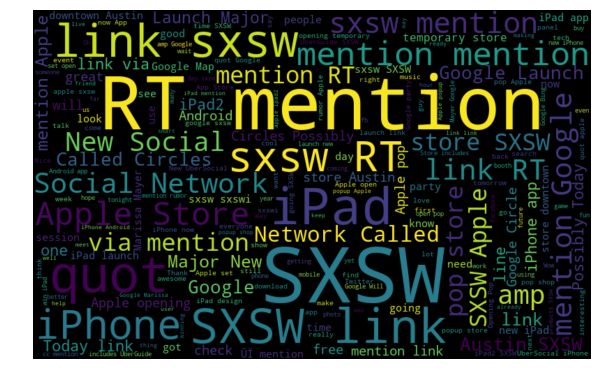

In [221]:
generate_wordcloud(df)